## Lab 02 - Pandas and Data Visualization
This notebook will introduce you to the basics of Pandas and Data Visualization. You will learn how to load data into a Pandas DataFrame, how to perform basic data analysis, and how to visualize data. The first part of this notebook will be an interactive tutorial, and the second part will be practice exercises for you to do! **Note that the practice problems will be checked when submitted!**

#### Pandas
Pandas is a popular open-source Python library that provides data structures and data analysis tools for working with structured data. Pandas is a versatile library that simplifies data manipulation, analysis, and exploration in Python. Some of its uses:
* Tabular Data Handling
* Data Cleaning and Transformation
* Data Exploration
* Data Import/Export
* Data Visualization

#### Matplotlib
Matplotlib is a widely used for creating static, animated, and interactive visualizations. Whether you are conducting data analysis, scientific research, or data communication, Matplotlib helps you present your findings effectively and intuitively.

### Pre-requisites

In [1]:
# In case you don't have pandas, uncomment
# the following lines and run the cell

# %pip install pandas

### Overview
In this notebook, you will be learning how to use the Pandas library by working with the `cookies.csv` file. 

#### `cookies.csv` file :

The `cookies.csv` file contains information about cookies that were made in Rico's Bisquito's factory. 

The columns are the following:

`cookie`: the name of a cookie
`ingredients`: a list of the cookie's ingredients
`calories`: the number of calories the created cookie has
`radius`: the radius of the created cookie, in cm
`cost_to_make`: the cost it took to make the created cookie, in dollars

### Reading the CSV file

First, we need to import the Pandas library. We will be using the `pd` alias for the Pandas library.

In [2]:
#TODO: import pandas and matplotlib in this cell
import pandas as pd
import matplotlib

We will now look at the `cookies.csv` file. We will use the `pd.read_csv()` function to read in the CSV file. We will store the data in a variable called `cookies`.

In [3]:
#TODO: read the cookies.csv file into a pandas dataframe
cookies = pd.read_csv("cookies.csv")

#### Dataframe
Dataframes are a data structure that Pandas uses to store data. Dataframes are similar to tables in a database. Dataframes have rows and columns. Each row represents a single data point, and each column represents a feature of the data point.

We will then make sure we imported the data correctly by printing out the first 10 rows of the data, using the `head()` function.

In [26]:
#TODO: print the head of the dataframe
cookies.head(10)

,cookie,ingredients,calories,radius,cost_to_make,cookie_radius_by_type
0,laddoo lemon,"[""flour"",""lemon juice"",""sugar"",""ghee""]",170,3.102,0.670000,3.782118
1,red velvet rauw,"[""flour"",""cocoa powder"",""butter"",""red food col...",198,3.780,1.070000,4.077444
2,nevadito,"[""flour"",""chocolate chips"",""milk"",""vanilla ext...",224,4.069,1.040000,4.013588
4,bbb,"[""flour"",""blueberries"",""sugar"",""butter""]",191,4.148,1.390000,3.911000
5,orange ozuna,"[""flour"",""orange juice"",""sugar"",""vegetable oil""]",162,3.241,1.150000,3.519353
6,minty miami,"[""flour"",""mint extract"",""sugar"",""butter""]",204,3.964,0.840000,3.727471
7,chocolate,"[""flour"",""chocolate chips"",""sugar"",""butter""]",243,3.684,1.170000,3.983667
8,laddoo lemon,"[""flour"",""lemon juice"",""sugar"",""ghee""]",178,3.989,1.176579,3.782118
9,minty miami,"[""flour"",""mint extract"",""sugar"",""butter""]",184,3.743,0.740000,3.727471
10,nevadito,"[""flour"",""chocolate chips"",""milk"",""vanilla ext...",216,3.848,1.280000,4.013588


### Checking data types
You can check the data types of each column using the `dtypes` attribute of the DataFrame.

In [27]:
#TODO: check the data types of the columns
cookies.dtypes

cookie                    object
ingredients               object
calories                   int64
radius                   float64
cost_to_make             float64
cookie_radius_by_type    float64
dtype: object

Now, lets use use `info()` function to get more information about the Dataframe

In [28]:
# TODO: use info() to get information about datatypes and null values
cookies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 118 entries, 0 to 127
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   cookie                 118 non-null    object 
 1   ingredients            118 non-null    object 
 2   calories               118 non-null    int64  
 3   radius                 118 non-null    float64
 4   cost_to_make           118 non-null    float64
 5   cookie_radius_by_type  118 non-null    float64
dtypes: float64(3), int64(1), object(2)
memory usage: 6.5+ KB


### Cleaning the data
Now that we have the data, we need to clean it. For example, some `cost_to_make` fields of some created cookies are missing. To resolve this, we can do many things: we can replace the missing data with the mean of the column, or we can get rid of the row entirely if the `cost_to_make` field is not set. 

In [29]:
#TODO: clean the dataframe and 
# print the head again to make sure 
# the changes took effect
mean_value = cookies["cost_to_make"].mean()
cookies.fillna(mean_value, inplace = True)
cookies.head(10)

,cookie,ingredients,calories,radius,cost_to_make,cookie_radius_by_type
0,laddoo lemon,"[""flour"",""lemon juice"",""sugar"",""ghee""]",170,3.102,0.670000,3.782118
1,red velvet rauw,"[""flour"",""cocoa powder"",""butter"",""red food col...",198,3.780,1.070000,4.077444
2,nevadito,"[""flour"",""chocolate chips"",""milk"",""vanilla ext...",224,4.069,1.040000,4.013588
4,bbb,"[""flour"",""blueberries"",""sugar"",""butter""]",191,4.148,1.390000,3.911000
5,orange ozuna,"[""flour"",""orange juice"",""sugar"",""vegetable oil""]",162,3.241,1.150000,3.519353
6,minty miami,"[""flour"",""mint extract"",""sugar"",""butter""]",204,3.964,0.840000,3.727471
7,chocolate,"[""flour"",""chocolate chips"",""sugar"",""butter""]",243,3.684,1.170000,3.983667
8,laddoo lemon,"[""flour"",""lemon juice"",""sugar"",""ghee""]",178,3.989,1.176579,3.782118
9,minty miami,"[""flour"",""mint extract"",""sugar"",""butter""]",184,3.743,0.740000,3.727471
10,nevadito,"[""flour"",""chocolate chips"",""milk"",""vanilla ext...",216,3.848,1.280000,4.013588


To also make sure we removed null values, we can check the number of null values in each column using the `isnull()` function.

In [30]:
#TODO: use the isnull method to make sure your data is clean
is_null = cookies.isnull()
null_counts = is_null.sum()
null_counts

cookie                   0
ingredients              0
calories                 0
radius                   0
cost_to_make             0
cookie_radius_by_type    0
dtype: int64

Next, lets check for duplicate rows using the `duplicated()` function. Then, remove those rows using `drop_duplicates()` function.

In [31]:
# TODO: check for duplicate rows
# then delete those rows form df
dupes = cookies.duplicated()
removed_dupes = cookies.drop_duplicates(inplace = True)

### Parsing the data
Now that we have the data, we could parse it to get the information we want. For example, we can check what types of cookies were made by using the `unique()` function on the `cookie` column.

In [32]:
#TODO: see what cookies are in the dataset
unique_cookies = cookies["cookie"].unique()
unique_cookies

array(['laddoo lemon', 'red velvet rauw', 'nevadito', 'bbb',
       'orange ozuna', 'minty miami', 'chocolate'], dtype=object)

We can also check the number of cookies made by using the `value_counts()` function on the `cookie` column.

In [33]:
#TODO: use value_counts() to see how many 
# cookies of each type there are
num_cookies = cookies["cookie"].value_counts()
num_cookies

red velvet rauw    18
laddoo lemon       17
nevadito           17
bbb                17
orange ozuna       17
minty miami        17
chocolate          15
Name: cookie, dtype: int64

Or maybe we don't like how long the names of the cookies are, so we can shorten them by using the `replace()` function on the `cookie` column.

For example, let's try changing `"bad berry bunny"` to `"bbb"`.

In [34]:
#TODO: change bad berry bunny data elements to "bbb"
cookies["cookie"].replace("bad berry bunny", "bbb", inplace = True)

We may even like the original names better, but we may want to get rid of the spaces. For example, we can change `"orange ozuna"` to `"orange_ozuna"`. Here, we will use the `str.replace()` function.

In [35]:
#TODO: adjust orange ozuna as described
cookies["cookie"].str.replace(" ", "_")

0         laddoo_lemon
1      red_velvet_rauw
2             nevadito
4                  bbb
5         orange_ozuna
            ...       
121          chocolate
122       laddoo_lemon
125           nevadito
126    red_velvet_rauw
127                bbb
Name: cookie, Length: 118, dtype: object

We may even just want to keep the first word of the cookie name. For example, we can change `"orange_ozuna"` to `"orange"`.

In [36]:
#TODO: adjust all cookies so only the first word
# is used as the cookie name
cookies["cookie"].str.split().str[0]

0         laddoo
1            red
2       nevadito
4            bbb
5         orange
         ...    
121    chocolate
122       laddoo
125     nevadito
126          red
127          bbb
Name: cookie, Length: 118, dtype: object

Another thing that may come to mind is that maybe getting flour could cost more money due to inflation, so we have to adjust our `cost_to_make` values. We can do this by using the `apply()` function on the `cost_to_make` column.

In [37]:
#Don't edit this method
def adjust_cost(cost):
    return cost + 0.5

#TODO: use apply() to adjust the cost_to_make column.
cookies["cookie"]["flour"]

KeyError: 'flour'

And we can do a lot more things! We will see these concepts be used in the next homework assignment, along with a couple new ones to show you how powerful Pandas is.

### More complicated operations: Grouping, Filtering, Aggregating

Before trying out these complicated operations, lets first sort the sort the df by the radius of the cookies using the `sort_values()` function.

In [ ]:
# TODO: sort the df using sort_values(by='Column', ascending=False)

We may also want to group data by certain attributes. This can be done by using `groupby()`. This method takes in a column name, and groups the data by the values in that column. For example, we can group the data by the `cookie` column.

In [ ]:
#TODO: group by cookie type

We can also group by multiple columns. For example, we can group the data by the `cookie` and `ingredients` columns.

In [ ]:
#TODO: group by cookie type and ingredients

We may also want to filter the data. For example, we can filter the data to only show the cookies that have a radius greater than 4.3 cm. We can do this by indexing the DataFrame with a boolean expression.

In [ ]:
#TODO: filter using the boolean expression

We may even want to use `groupby()` and filter idea together! For example, we can filter the data to only show the cookies that have a radius greater than 4.3 cm, and group the data by the `cookie` column.

In [ ]:
#TODO: filter the data using the boolean expression
# then group by cookie column

We may also want to aggregate the data. For example, we can aggregate the data by looking at the ratio of calories to radius. We can do this by using indexing and the `apply()` function.

In [ ]:
#TODO: add a column to the dataframe that is the
# calories per radius

Or we can just get rid of this column if we find it useless. We can do this by using the `drop()` function or indexing.

In [ ]:
#TODO: drop the created column

### Visualizing the data

We can also visualize the data. For example, we can visualize the data by plotting the radius of the cookies against the cost to make the cookies. We can do this by using the `plot()` function.

In [ ]:
#TODO: plot the radius (x) versus cost to make (y)

We may even want to get more specific and visualize the shape of a distribution of the `laddoo lemon`'s radius by making a boxplot. We can also do this by using the `plot()` function.

In [ ]:
#TODO: add the described boxplot
# remember that you changed the name from laddoo lemon to laddoo

Alternatively, we can create a histogram to visualize the distribution of the `laddoo lemon`'s radius. We can also do this by using the `plot()` function.

In [ ]:
#TODO: add the described histogram

Things can get more complicated too. Maybe we want to analyze the behaviors of `bad berry bunny` and `laddoo lemon`'s radius using a boxplot. But this time, let's try it using the alternative `boxplot()` function. For practice, try doing it with `plot()` too!

In [ ]:
#TODO: analyze the two cookie's radius in a boxplot

### Practice Problems
Now that you have learned some of Pandas' capabilities, let's try some practice problems! **This is the part that will be checked when you submit it!**

#### Problem 1
How many cookies were made? (Hint: use the `shape` attribute)

In [38]:
#Add your code here
print(cookies["cookie"].shape[0], "cookies were made")

118 cookies were made


#### Problem 2
Add a column to the DataFrame that has the value `True` if the cookie has a radius greater than 4 cm, and `False` otherwise. (Hint: use the `apply()` function)

In [39]:
#Add your code here
def radius_check(radius):
    return radius > 4
cookies["big_cookie"] = cookies["radius"].apply(radius_check)

cookies

,cookie,ingredients,calories,radius,cost_to_make,cookie_radius_by_type,big_cookie
0,laddoo lemon,"[""flour"",""lemon juice"",""sugar"",""ghee""]",170,3.102,0.67,3.782118,False
1,red velvet rauw,"[""flour"",""cocoa powder"",""butter"",""red food col...",198,3.780,1.07,4.077444,False
2,nevadito,"[""flour"",""chocolate chips"",""milk"",""vanilla ext...",224,4.069,1.04,4.013588,True
4,bbb,"[""flour"",""blueberries"",""sugar"",""butter""]",191,4.148,1.39,3.911000,True
5,orange ozuna,"[""flour"",""orange juice"",""sugar"",""vegetable oil""]",162,3.241,1.15,3.519353,False
...,...,...,...,...,...,...,...
121,chocolate,"[""flour"",""chocolate chips"",""sugar"",""butter""]",227,4.085,1.42,3.983667,True
122,laddoo lemon,"[""flour"",""lemon juice"",""sugar"",""ghee""]",170,3.916,2.00,3.782118,False
125,nevadito,"[""flour"",""chocolate chips"",""milk"",""vanilla ext...",211,3.915,1.61,4.013588,False
126,red velvet rauw,"[""flour"",""cocoa powder"",""butter"",""red food col...",197,3.906,1.33,4.077444,False


#### Problem 3

Group the data by the `cookie` column, and find the average radius of each cookie. (Hint: use the `groupby()` and `transform()` function). Add this column to the DataFrame.

In [40]:
#Add your code here

def radius_by_cookie(group):
    return (group.mean())

cookies["cookie_radius_by_type"] = cookies.groupby("cookie")["radius"].transform(radius_by_cookie)
cookies

,cookie,ingredients,calories,radius,cost_to_make,cookie_radius_by_type,big_cookie
0,laddoo lemon,"[""flour"",""lemon juice"",""sugar"",""ghee""]",170,3.102,0.67,3.782118,False
1,red velvet rauw,"[""flour"",""cocoa powder"",""butter"",""red food col...",198,3.780,1.07,4.077444,False
2,nevadito,"[""flour"",""chocolate chips"",""milk"",""vanilla ext...",224,4.069,1.04,4.013588,True
4,bbb,"[""flour"",""blueberries"",""sugar"",""butter""]",191,4.148,1.39,3.911000,True
5,orange ozuna,"[""flour"",""orange juice"",""sugar"",""vegetable oil""]",162,3.241,1.15,3.519353,False
...,...,...,...,...,...,...,...
121,chocolate,"[""flour"",""chocolate chips"",""sugar"",""butter""]",227,4.085,1.42,3.983667,True
122,laddoo lemon,"[""flour"",""lemon juice"",""sugar"",""ghee""]",170,3.916,2.00,3.782118,False
125,nevadito,"[""flour"",""chocolate chips"",""milk"",""vanilla ext...",211,3.915,1.61,4.013588,False
126,red velvet rauw,"[""flour"",""cocoa powder"",""butter"",""red food col...",197,3.906,1.33,4.077444,False


#### Problem 4
Create a new DataFrame that only contains the cookies that have the ingredient `"chocolate chips"`. (Hint: use the `str.contains()` function)

In [41]:
#Add your code here
choco_only = cookies[cookies["ingredients"].str.contains("chocolate chips")]
choco_only

,cookie,ingredients,calories,radius,cost_to_make,cookie_radius_by_type,big_cookie
2,nevadito,"[""flour"",""chocolate chips"",""milk"",""vanilla ext...",224,4.069,1.040000,4.013588,True
7,chocolate,"[""flour"",""chocolate chips"",""sugar"",""butter""]",243,3.684,1.170000,3.983667,False
10,nevadito,"[""flour"",""chocolate chips"",""milk"",""vanilla ext...",216,3.848,1.280000,4.013588,False
17,chocolate,"[""flour"",""chocolate chips"",""sugar"",""butter""]",209,3.182,1.530000,3.983667,False
19,nevadito,"[""flour"",""chocolate chips"",""milk"",""vanilla ext...",236,4.043,1.290000,4.013588,True
25,chocolate,"[""flour"",""chocolate chips"",""sugar"",""butter""]",205,3.383,1.176579,3.983667,False
29,nevadito,"[""flour"",""chocolate chips"",""milk"",""vanilla ext...",219,4.346,1.180000,4.013588,True
34,chocolate,"[""flour"",""chocolate chips"",""sugar"",""butter""]",205,3.937,1.176579,3.983667,False
36,nevadito,"[""flour"",""chocolate chips"",""milk"",""vanilla ext...",211,4.152,1.720000,4.013588,True
41,chocolate,"[""flour"",""chocolate chips"",""sugar"",""butter""]",206,3.681,1.176579,3.983667,False


#### Problem 5

Create a boxplot of `cost_to_make` for all cookies except `chocolate` using the `boxplot()` function.

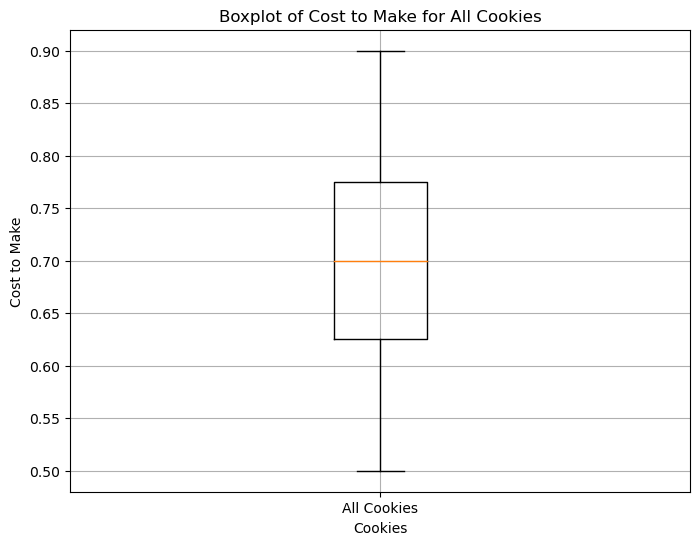

In [47]:
#Add your code here
#import matplotlib.pyplot as plt

no_choco = cookies[cookies["cookie"] != "chocolate"]

plt.figure(figsize=(8, 6))
plt.boxplot(cookies["cost_to_make"], labels = ["Cookies"])
plt.xlabel("Cookies")
plt.ylabel("Cost to Make")
plt.title(f"Boxplot for stuff")
plt.grid(True)
plt.show()

#### Problem 6

Create a histogram of the `bad berry bunny`'s calories using the `plot()` function.

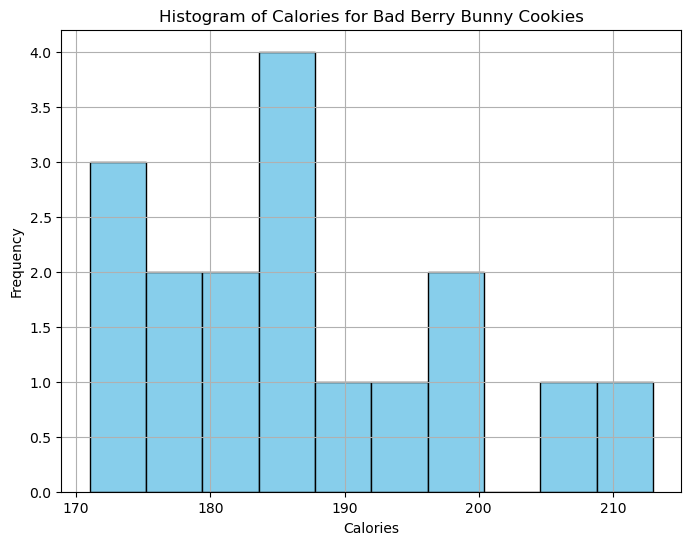

In [42]:
#Add your code here
filtered_calories = cookies[cookies["cookie"] == "bbb"]["calories"]
plt.figure(figsize=(8, 6))
plt.hist(filtered_calories, bins=10, color='skyblue', edgecolor='black')
plt.xlabel('Calories')
plt.ylabel('Frequency')
plt.title(f'Histogram of Calories for Bad Berry Bunny Cookies')
plt.grid(True)
plt.show()

#### Problem 7

Calculate the average calories per cookie type and display the result in a bar chart.

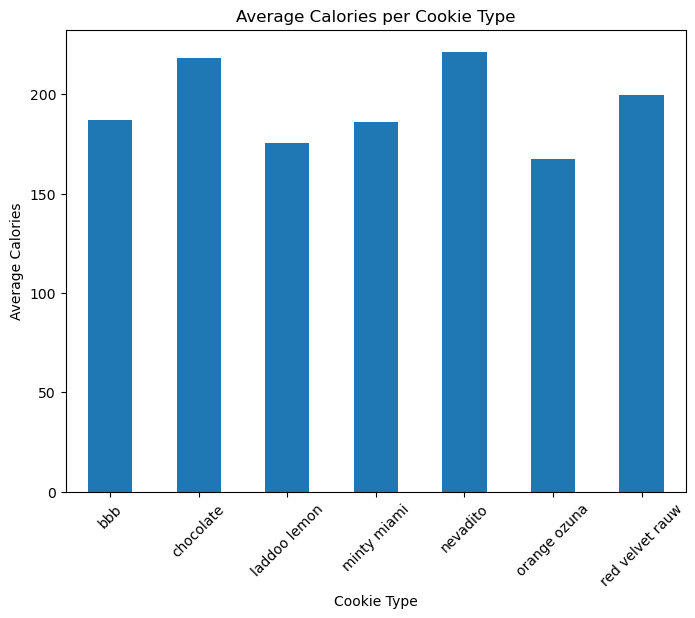

In [43]:
#Add your code here
import matplotlib.pyplot as plt

average_calories = cookies.groupby("cookie")["calories"].mean()
average_calories.plot(kind="bar", figsize=(8, 6))
plt.xlabel('Cookie Type')
plt.ylabel('Average Calories')
plt.title('Average Calories per Cookie Type')
plt.xticks(rotation=45)
plt.show()

#### Problem 8

Find the top 3 most expensive cookies in terms of cost_to_make

In [44]:
#Add your code here
cookies.nlargest(3, "cost_to_make")

,cookie,ingredients,calories,radius,cost_to_make,cookie_radius_by_type,big_cookie
42,laddoo lemon,"[""flour"",""lemon juice"",""sugar"",""ghee""]",176,4.110,2.27,3.782118,True
50,nevadito,"[""flour"",""chocolate chips"",""milk"",""vanilla ext...",220,3.855,2.21,4.013588,False
13,orange ozuna,"[""flour"",""orange juice"",""sugar"",""vegetable oil""]",159,3.429,2.09,3.519353,False
